In [1]:
import pandas as pd

In [2]:
# Step 1: Load the dataset
df = pd.read_csv("Health_Insurance_Fraud_Claims.csv")

In [3]:
df.shape

(4500, 19)

In [4]:
df.columns

Index(['ClaimID', 'PatientID', 'ProviderID', 'ClaimAmount', 'ClaimDate',
       'DiagnosisCode', 'ProcedureCode', 'PatientAge', 'PatientGender',
       'ProviderSpecialty', 'ClaimStatus', 'PatientIncome',
       'PatientMaritalStatus', 'PatientEmploymentStatus', 'ProviderLocation',
       'ClaimType', 'ClaimSubmissionMethod', 'Cluster', 'ClaimLegitimacy'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4500 entries, 0 to 4499
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ClaimID                  4500 non-null   object 
 1   PatientID                4500 non-null   object 
 2   ProviderID               4500 non-null   object 
 3   ClaimAmount              4500 non-null   float64
 4   ClaimDate                4500 non-null   object 
 5   DiagnosisCode            4500 non-null   object 
 6   ProcedureCode            4500 non-null   object 
 7   PatientAge               4500 non-null   int64  
 8   PatientGender            4500 non-null   object 
 9   ProviderSpecialty        4500 non-null   object 
 10  ClaimStatus              4500 non-null   object 
 11  PatientIncome            4500 non-null   float64
 12  PatientMaritalStatus     4500 non-null   object 
 13  PatientEmploymentStatus  4500 non-null   object 
 14  ProviderLocation        

In [6]:
df=df.drop(["ClaimID", "PatientID", "ProviderID", "ClaimDate", "DiagnosisCode","ProcedureCode","ProviderSpecialty", "ClaimStatus", "ProviderLocation", "Cluster"], axis=1)

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4500 entries, 0 to 4499
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ClaimAmount              4500 non-null   float64
 1   PatientAge               4500 non-null   int64  
 2   PatientGender            4500 non-null   object 
 3   PatientIncome            4500 non-null   float64
 4   PatientMaritalStatus     4500 non-null   object 
 5   PatientEmploymentStatus  4500 non-null   object 
 6   ClaimType                4500 non-null   object 
 7   ClaimSubmissionMethod    4500 non-null   object 
 8   ClaimLegitimacy          4500 non-null   object 
dtypes: float64(2), int64(1), object(6)
memory usage: 316.5+ KB


In [37]:
df["ClaimLegitimacy"].value_counts()

ClaimLegitimacy
Legitimate    4230
Fraud          270
Name: count, dtype: int64

In [38]:
df['ClaimLegitimacy'] = df['ClaimLegitimacy'].map({'Legitimate': 0, 'Fraud': 1})

In [39]:
from sklearn.preprocessing import LabelEncoder

# Identify categorical columns
categorical_cols = df.select_dtypes(include=['object', 'category']).columns

# Apply Label Encoding
le = LabelEncoder()
for col in categorical_cols:
    df[col] = le.fit_transform(df[col])

# df_encoded now has label-encoded categorical columns
print("Label-encoded DataFrame:")
print(df.head())

Label-encoded DataFrame:
   ClaimAmount  PatientAge  PatientGender  PatientIncome  \
0      7820.52          96              0       57595.11   
1      5453.86          95              1      140772.72   
2      8229.86          10              1       69803.19   
3      9519.16          59              0      135530.12   
4      3226.15          36              0       36995.52   

   PatientMaritalStatus  PatientEmploymentStatus  ClaimType  \
0                     2                        0          1   
1                     3                        0          1   
2                     1                        2          0   
3                     1                        0          3   
4                     0                        3          1   

   ClaimSubmissionMethod  ClaimLegitimacy  
0                      1                0  
1                      0                0  
2                      0                0  
3                      2                0  
4              

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4500 entries, 0 to 4499
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ClaimAmount              4500 non-null   float64
 1   PatientAge               4500 non-null   int64  
 2   PatientGender            4500 non-null   int32  
 3   PatientIncome            4500 non-null   float64
 4   PatientMaritalStatus     4500 non-null   int32  
 5   PatientEmploymentStatus  4500 non-null   int32  
 6   ClaimType                4500 non-null   int32  
 7   ClaimSubmissionMethod    4500 non-null   int32  
 8   ClaimLegitimacy          4500 non-null   int64  
dtypes: float64(2), int32(5), int64(2)
memory usage: 228.6 KB


In [41]:
df.head()

,ClaimAmount,PatientAge,PatientGender,PatientIncome,PatientMaritalStatus,PatientEmploymentStatus,ClaimType,ClaimSubmissionMethod,ClaimLegitimacy
0,7820.52,96,0,57595.11,2,0,1,1,0
1,5453.86,95,1,140772.72,3,0,1,0,0
2,8229.86,10,1,69803.19,1,2,0,0,0
3,9519.16,59,0,135530.12,1,0,3,2,0
4,3226.15,36,0,36995.52,0,3,1,2,0


In [42]:
df.shape

(4500, 9)

In [43]:
# Step 2: Shuffle the dataset randomly
df = df.sample(frac=1, random_state=42).reset_index(drop=True)

In [44]:
# Step 3: Calculate the split index for 70%
split_index = int(0.7 * len(df))

In [45]:
df.columns

Index(['ClaimAmount', 'PatientAge', 'PatientGender', 'PatientIncome',
       'PatientMaritalStatus', 'PatientEmploymentStatus', 'ClaimType',
       'ClaimSubmissionMethod', 'ClaimLegitimacy'],
      dtype='object')

In [46]:
# Split dataset
df_70 = df.iloc[:split_index]
df_30 = df.iloc[split_index:]

In [47]:
# Save 70% with target
df_70.to_csv("dataset_70_percent_with_target.csv", index=False)
 
# Save 30% with target
df_30.to_csv("dataset_30_percent_with_target.csv", index=False)
 
print("✅ Data split into 4 files and saved successfully.")
 

✅ Data split into 4 files and saved successfully.


In [48]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.neighbors import LocalOutlierFactor
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from scipy.stats import f_oneway
import pickle

In [49]:
# Load and preprocess data
df = pd.read_csv("dataset_70_percent_with_target.csv")

In [50]:
# Select only numeric columns
numeric_cols = df.select_dtypes(include=['number']).columns

# Check for negative values only in numeric columns
negative_values = (df[numeric_cols] < 0).sum()
print("Count of negative values per numeric column:")
print(negative_values[negative_values > 0])  # show columns with negatives only

Count of negative values per numeric column:
Series([], dtype: int64)


In [51]:
# Check for duplicate rows
duplicates = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")

# Optional: display duplicates if you want to inspect
if duplicates > 0:
    print("Duplicate rows:")
    print(df[df.duplicated()])

Number of duplicate rows: 0


In [52]:
df = df.drop_duplicates()

In [53]:
df.duplicated().sum()

0

In [54]:
df.isnull().sum()

ClaimAmount                0
PatientAge                 0
PatientGender              0
PatientIncome              0
PatientMaritalStatus       0
PatientEmploymentStatus    0
ClaimType                  0
ClaimSubmissionMethod      0
ClaimLegitimacy            0
dtype: int64

In [55]:
df

,ClaimAmount,PatientAge,PatientGender,PatientIncome,PatientMaritalStatus,PatientEmploymentStatus,ClaimType,ClaimSubmissionMethod,ClaimLegitimacy
0,1703.04,30,1,61778.09,3,0,3,1,0
1,5251.05,86,1,134484.58,2,0,2,0,0
2,5017.28,98,1,50423.66,1,2,1,0,0
3,838.05,14,1,57209.16,3,0,1,2,0
4,5204.40,4,0,113162.15,3,3,3,0,0
...,...,...,...,...,...,...,...,...,...
3145,8242.56,2,0,23902.63,3,2,2,0,1
3146,6034.67,0,1,137180.29,3,3,3,1,0
3147,9344.12,14,0,49529.38,1,1,3,0,1
3148,2106.06,84,1,54665.30,0,1,2,2,0


In [56]:
df.columns

Index(['ClaimAmount', 'PatientAge', 'PatientGender', 'PatientIncome',
       'PatientMaritalStatus', 'PatientEmploymentStatus', 'ClaimType',
       'ClaimSubmissionMethod', 'ClaimLegitimacy'],
      dtype='object')

In [57]:
# Separate features and target
X = df.drop("ClaimLegitimacy", axis=1)
y = df["ClaimLegitimacy"]

In [58]:
from sklearn.feature_selection import SelectKBest, f_classif
import pandas as pd

# Run ANOVA F-test
selector = SelectKBest(score_func=f_classif, k='all')
X_selected = selector.fit_transform(X, y)

# Get scores and p-values
f_scores = selector.scores_
p_values = selector.pvalues_

# Combine into a DataFrame
anova_df = pd.DataFrame({
    'Feature': X.columns,
    'F-Score': f_scores,
    'p-Value': p_values
}).sort_values(by='F-Score', ascending=False)

# Filter for important features (e.g., p < 0.05)
important_features = anova_df[anova_df['p-Value'] < 0.05]['Feature'].tolist()

print("Selected Important Features based on ANOVA (p < 0.05):")
print(important_features)

# Create new DataFrame with only selected features
X_selected_df = df[important_features]

Selected Important Features based on ANOVA (p < 0.05):
['PatientIncome', 'ClaimAmount']


In [59]:
# Columns
# continuous_cols = ['ClaimAmount', 'PatientIncome', 'PatientAge']
# other_cols = [col for col in X.columns if col not in continuous_cols]

# Apply StandardScaler only to continuous columns
scaler = StandardScaler()
X_scaled_df = scaler.fit_transform(X_selected_df)

In [60]:
X_scaled_df = pd.DataFrame(X_scaled_df, columns=X_selected_df.columns, index=X.index)

In [61]:
X_scaled_df

,PatientIncome,ClaimAmount
0,-0.612834,-1.176237
1,1.346560,0.069673
2,-0.918828,-0.012417
3,-0.735963,-1.479984
4,0.771934,0.053292
...,...,...
3145,-1.633553,1.120164
3146,1.419208,0.344847
3147,-0.942929,1.506985
3148,-0.804519,-1.034713


In [62]:
# Split into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X_scaled_df, y, test_size=0.2, random_state=42)

# Save scaler for inference
with open('scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)

# Train LOF model with novelty=True
lof = LocalOutlierFactor(n_neighbors=10, contamination=0.05, novelty=True)
print("Training Data Columns:", X_train.columns.tolist())
lof.fit(X_train)
print("Model fitted successfully")

lof.fit(X_train)  # fit only

# Save the trained LOF model to a pickle file
with open('lof_model.pkl', 'wb') as f:
    pickle.dump(lof, f)

Training Data Columns: ['PatientIncome', 'ClaimAmount']
Model fitted successfully


<class 'pandas.core.frame.DataFrame'>
Training Performance:
Confusion Matrix:
 [[2281   90]
 [ 146    3]]

Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.96      0.95      2371
           1       0.03      0.02      0.02       149

    accuracy                           0.91      2520
   macro avg       0.49      0.49      0.49      2520
weighted avg       0.89      0.91      0.90      2520


Accuracy Score: 0.9063492063492063


c:\Users\DELL\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(


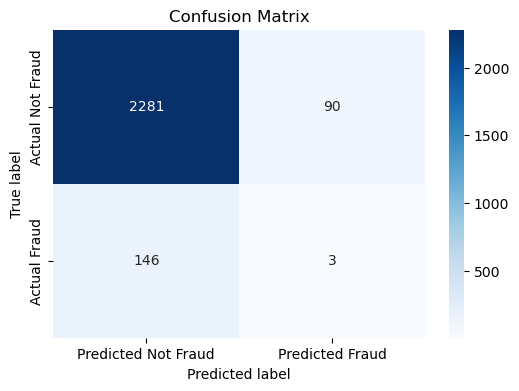

In [63]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_recall_fscore_support
import numpy as np

# Predict on training data for evaluation
print(type(X_train))  # should output: <class 'pandas.core.frame.DataFrame'>

train_preds = lof.predict(X_train)
train_preds = np.where(train_preds == -1, 1, 0)  # -1 means anomaly, convert to 1

# Text output
print("Training Performance:")
print("Confusion Matrix:\n", confusion_matrix(y_train, train_preds))
print("\nClassification Report:\n", classification_report(y_train, train_preds))
print("\nAccuracy Score:", accuracy_score(y_train, train_preds))

# Confusion matrix plot
cm = confusion_matrix(y_train, train_preds)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted Not Fraud', 'Predicted Fraud'], yticklabels=['Actual Not Fraud', 'Actual Fraud'])
plt.title('Confusion Matrix')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

# Classification report metrics (precision, recall, f1-score)
report = classification_report(y_train, train_preds, output_dict=True)
labels = ['0', '1']  # 0: Not Fraud, 1: Fraud

precision = [report[label]['precision'] for label in labels]
recall = [report[label]['recall'] for label in labels]
f1 = [report[label]['f1-score'] for label in labels]
